<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%2016%20/%20uas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING NECESSARY LIBRARY

In [1]:
!pip install split-folders
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [3]:
## To connect Google Drive (GDrive) with Colab
# Step:2 Mount drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## MAKE SUBSET OF TRAIN, TEST, VALIDATION

In [19]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 120 files [00:45,  2.65 files/s]


In [20]:
# Sorting the path of data into variable
train_dir = 'output/train'  #Location of training images
validation_dir = 'output/val' # Location of test images
test_dir ='output/test' # Location of test images

## GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES

In [6]:
# Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


Found 96 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


## PLOTTING TRAIN IMAGES WITH THEIR LABELS

In [7]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

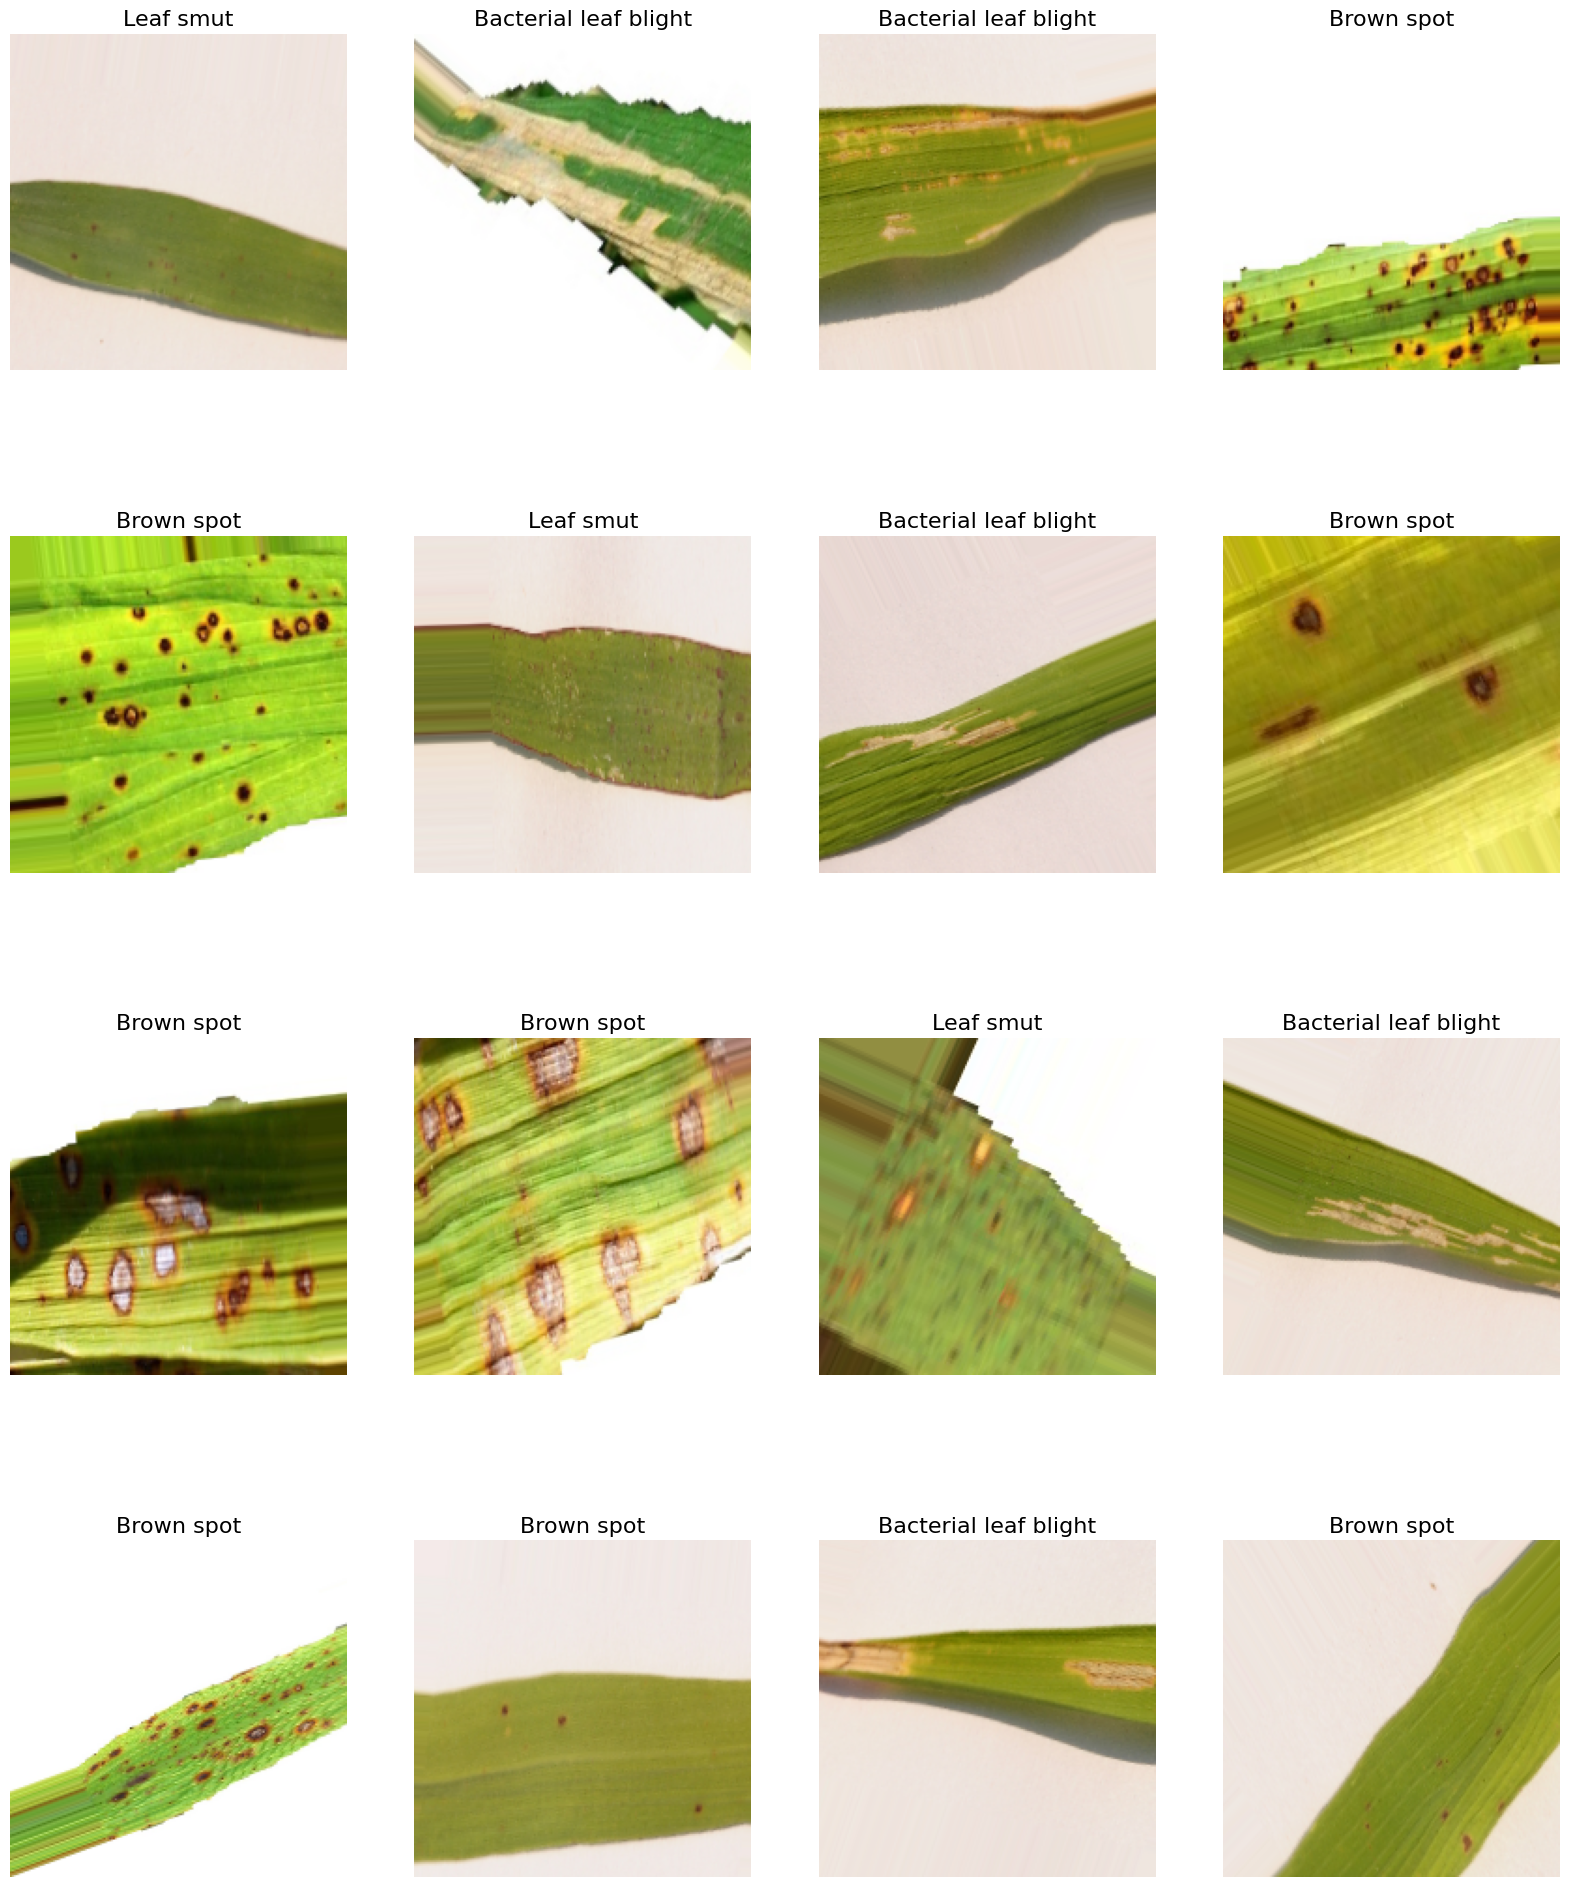

In [8]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

## CNN MODEL ARCHITECTURE

In [9]:
from keras.layers.core.activation import Activation
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation ='softmax'))

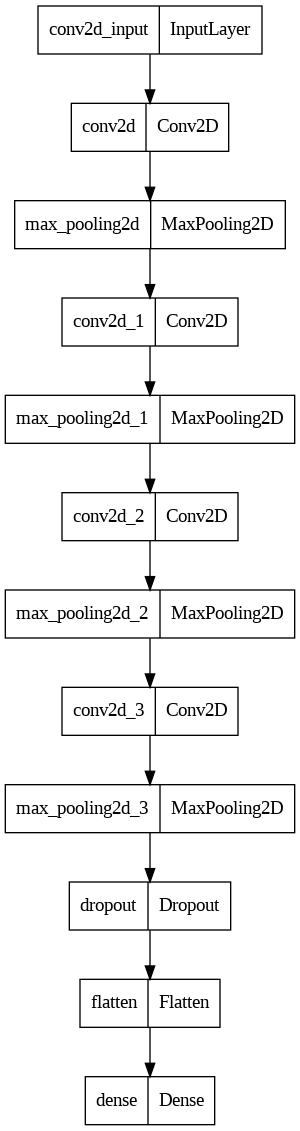

In [10]:
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.plot_model(model)

## SUMMARY OF MODEL

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## COMPILE MODEL & TRAIN MODEL

In [12]:
from tensorflow.keras import optimizers

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)

## TRAIN MODEL

In [13]:
for _ in range(5):
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator
    )

Epoch 1/30
6/6 [==============================] - 25s 4s/step - loss: 1.1396 - accuracy: 0.3125 - val_loss: 1.1138 - val_accuracy: 0.3333
Epoch 2/30
6/6 [==============================] - 16s 3s/step - loss: 1.0962 - accuracy: 0.4062 - val_loss: 1.0917 - val_accuracy: 0.3333
Epoch 3/30
6/6 [==============================] - 13s 2s/step - loss: 1.0727 - accuracy: 0.4167 - val_loss: 1.0737 - val_accuracy: 0.4167
Epoch 4/30
6/6 [==============================] - 12s 2s/step - loss: 1.0166 - accuracy: 0.4896 - val_loss: 1.0656 - val_accuracy: 0.3333
Epoch 5/30
6/6 [==============================] - 12s 2s/step - loss: 1.0000 - accuracy: 0.5104 - val_loss: 1.1213 - val_accuracy: 0.3333
Epoch 6/30
6/6 [==============================] - 14s 2s/step - loss: 1.0588 - accuracy: 0.4583 - val_loss: 1.0868 - val_accuracy: 0.4167
Epoch 7/30
6/6 [==============================] - 13s 2s/step - loss: 0.9362 - accuracy: 0.5312 - val_loss: 1.0512 - val_accuracy: 0.5833
Epoch 8/30
6/6 [==================

### AFTER TRAINING


*   Validation accuracy :  91.67 %
*   Training accuracy : 94.79 %

## MODEL SAVING

In [14]:
model.save("model.keras")

## PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS

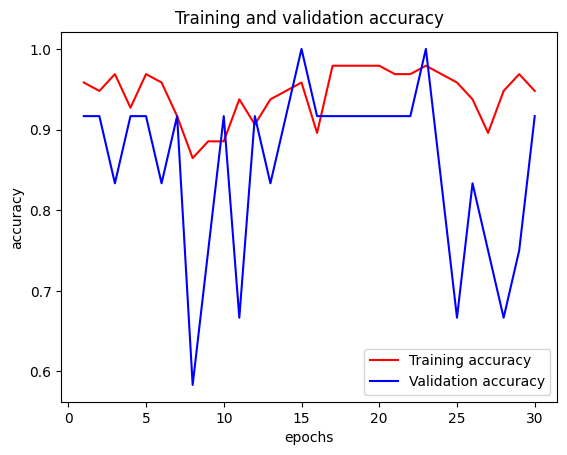

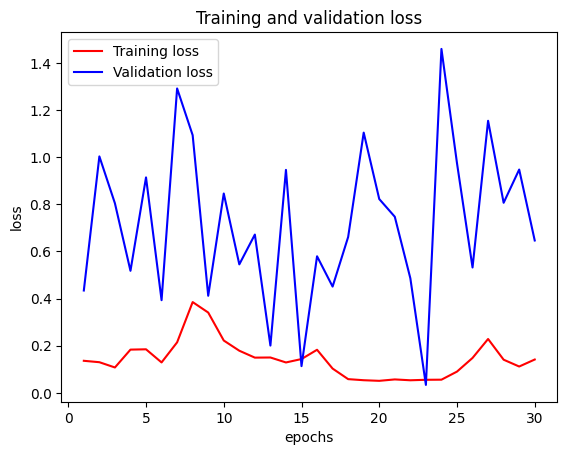

In [15]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## EVALUATION AND TESTING MODEL

In [16]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical'
)

Found 12 images belonging to 3 classes.


In [17]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 655ms/step - loss: 3.1054 - accuracy: 0.7500


[3.105438232421875, 0.75]

### Here the accuracy of the model is 0.75 = 75%.

## VISUALISE THE PREDICTION OF MODEL

1/1 [==============================] - 0s 72ms/step


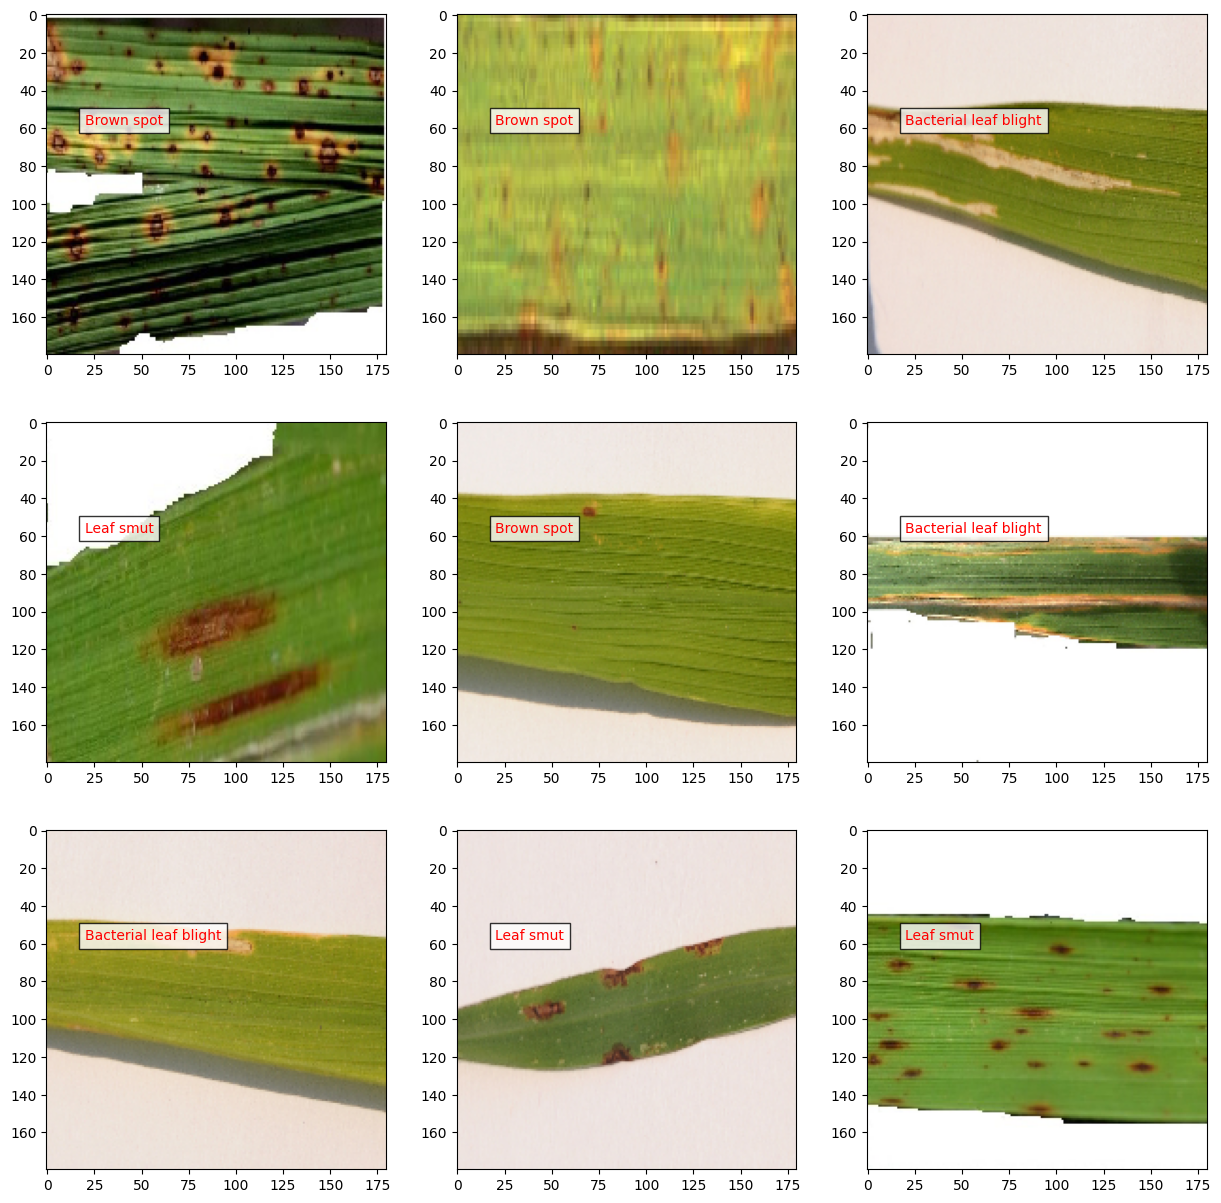

In [18]:
imgs, labels = next(test_generator)
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    img_t = np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t)
    idx = np.argmax(prediction)
    plt.text(20, 58, class_names[idx], color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    plt.imshow(imgs[i])
    
plt.show()